# **French Adjectives Gender Classification in Word Embeddings: SHAP  Analysis on a MLP Model**

# Step 1: Dataset Laoding (French Adjectives Embeddings)

In [ ]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import gdown
import pandas as pd

# Define the French Adjectives Embeddings files links and corresponding output file names
file_links = {
    #"camem_bert_base_embeddings": "1D7jbsNIinPTapETRzWimlPyU0y8tx49P",
    #"distilled_bert_base_cased": "1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV",
    "flaubert_base_cased": "1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY",
    "flaubert_base_uncased": "1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE",
    "flaubert_large_uncased": "1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_",
    "flaubert_small_cased": "1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza",
    #"mbert_base_cased": "1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE",
    #"mbert_base_uncased": "1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_",
    #"xlmr_r_large": "1J43o7gZslJemN8HMdSPzkhENMW52wFVX",
    #"xlm_roberta_base": "1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From: https://drive.google.com/uc?id=1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY
To: /content/flaubert_base_cased.csv
100%|██████████| 53.7M/53.7M [00:02<00:00, 24.5MB/s]


Loaded flaubert_base_cased into dataframe with shape (6504, 770)


Downloading...
From: https://drive.google.com/uc?id=1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE
To: /content/flaubert_base_uncased.csv
100%|██████████| 63.3M/63.3M [00:00<00:00, 67.6MB/s]


Loaded flaubert_base_uncased into dataframe with shape (7590, 770)


Downloading...
From: https://drive.google.com/uc?id=1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_
To: /content/flaubert_large_uncased.csv
100%|██████████| 68.4M/68.4M [00:00<00:00, 71.2MB/s]


Loaded flaubert_large_uncased into dataframe with shape (6504, 1026)


Downloading...
From: https://drive.google.com/uc?id=1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza
To: /content/flaubert_small_cased.csv
100%|██████████| 34.7M/34.7M [00:00<00:00, 52.4MB/s]


Loaded flaubert_small_cased into dataframe with shape (6504, 514)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [ ]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: flaubert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,abaissé,-0.918781,1.270494,0.499801,-1.218287,-1.628986,-1.613672,-0.797011,-0.651525,3.594234,...,-0.640286,-0.733001,2.273470,-1.890065,0.101750,-1.427633,1.774759,2.584023,1.554491,1
1,abandonné,2.863762,-1.059737,-1.486443,-2.744633,-1.571150,-0.641777,1.524477,2.084344,1.240918,...,-0.289288,-2.012972,-0.572296,-1.816853,-0.209396,1.236967,-0.053298,-2.778430,2.007350,1
2,abandonnés,-0.371296,-0.050010,0.533110,-0.851078,-0.600845,-0.739243,1.456376,-1.529993,2.805923,...,-1.530287,-1.483397,1.260332,-0.036269,0.846842,1.064330,-0.563699,-1.299612,1.180093,1
3,abandonnée,-1.186011,0.007531,0.194924,-1.352353,-0.308535,-0.288511,1.979470,0.428561,0.493124,...,-1.367204,-1.750390,2.242464,-0.547705,0.838512,-0.339999,-1.398915,-0.775970,2.066413,0
4,abandonnées,-2.222785,1.152770,-0.684513,1.603904,0.768779,-0.852416,2.557635,-0.684933,0.009467,...,-0.093439,-2.533424,2.458004,-0.163610,2.217702,-0.281115,-2.738135,-0.114744,2.793698,0



Dataset: flaubert_base_uncased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,abaissé,2.621718,1.058196,-2.318899,-1.674511,-1.074355,-1.643577,1.386274,0.010937,-0.799108,...,-0.415430,-0.834220,0.271153,-1.047917,-1.927666,-1.488610,0.514340,2.111289,-2.326296,1
1,abandonné,0.280524,-0.144711,0.528185,0.144140,0.230183,-0.040055,0.268016,-0.565140,-0.554367,...,0.116858,-1.009973,-0.006870,-0.074967,0.373439,-0.349506,0.394734,0.784362,0.289680,1
2,abandonnés,1.061980,0.936795,-0.518378,-0.936642,-0.155399,0.704027,-0.052653,-1.176456,0.391137,...,0.853773,-1.275528,-0.637556,0.106471,-0.304190,-0.057929,0.684608,1.271967,-1.233760,1
3,abandonnée,0.294893,-0.103359,0.503212,0.199510,0.236652,-0.058838,0.267703,-0.527025,-0.566889,...,0.075058,-0.972327,-0.036799,-0.053553,0.362556,-0.299846,0.465510,0.766712,0.307228,0
4,abandonnées,0.594621,1.257480,-0.362478,-1.021854,0.135070,1.066053,0.050838,0.242360,2.544349,...,0.759872,-0.282840,-0.450266,-0.805945,0.970804,-0.968628,1.725146,-0.802008,-1.728689,0



Dataset: flaubert_large_uncased


,Word,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Gender
0,abaissé,8.417181,2.991504,7.223108,1.804217,-1.662505,-1.405776,-6.990140,-1.935549,-0.866295,...,-8.055243,1.889913,4.684276,-4.807503,4.246702,-8.148845,5.317069,-1.790614,-4.958454,1
1,abandonné,7.530680,-2.721532,0.976377,3.504943,-8.003117,-11.467283,-8.396865,-4.816326,-1.449822,...,-8.277680,11.013186,-3.393347,0.810191,-2.409187,-0.509441,10.261601,-0.939758,-2.023417,1
2,abandonnés,10.655356,-1.363855,1.617834,3.609336,-4.177451,-2.333333,-7.140361,-9.443039,0.824445,...,-3.135538,11.558518,-7.171202,3.666796,2.480921,-3.236192,10.690329,-15.576269,-2.418116,1
3,abandonnée,6.289164,-0.849660,2.392667,1.224719,-7.215847,-6.416592,-7.608029,-4.185183,-0.070570,...,-8.475337,7.477155,-1.527506,-2.160920,2.176750,-3.993118,12.508919,-1.872578,-4.119229,0
4,abandonnées,11.004598,2.897560,2.697474,1.960002,-10.596423,-2.876914,-5.803624,-4.449602,-3.424097,...,-7.130783,12.722145,-6.090196,-3.009981,1.481291,-2.492039,12.758733,-11.315008,-2.102387,0



Dataset: flaubert_small_cased


,Word,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,Gender
0,abaissé,-0.900003,-2.879976,4.960131,-0.483776,-2.544397,-3.173748,1.268426,1.158909,3.327399,...,2.768781,-3.027293,0.653054,-0.005547,-4.565602,-7.752979,-2.755292,2.423891,-0.766143,1
1,abandonné,3.975725,1.015186,0.763171,-3.765544,-0.216141,-7.908770,-2.510229,1.091638,-3.004829,...,-3.444683,-0.447361,-5.088787,-0.067820,-6.931626,-4.377660,-5.601128,2.917005,-6.060720,1
2,abandonnés,4.381264,2.659397,-0.302109,0.330213,-0.782303,-5.653428,-1.347949,2.838606,-5.429182,...,-2.035767,0.316176,-2.783939,-0.994179,-3.623413,-3.733535,-5.347573,4.459940,-1.087981,1
3,abandonnée,3.936753,1.365096,0.601900,-3.841948,0.137243,-6.720107,-4.014627,-0.164518,-4.163127,...,0.635821,-1.122231,-4.691674,-1.861965,-7.399370,-3.871465,-4.995703,4.840462,-0.697729,0
4,abandonnées,5.809262,1.358246,0.284348,-5.529526,0.384123,-7.862865,-0.806412,2.218282,-5.085275,...,0.690692,-0.932139,-2.969352,-4.903651,-5.584019,-3.111172,-3.887118,3.173834,-0.738421,0


### 2.2 Embedding Dimensions in Model

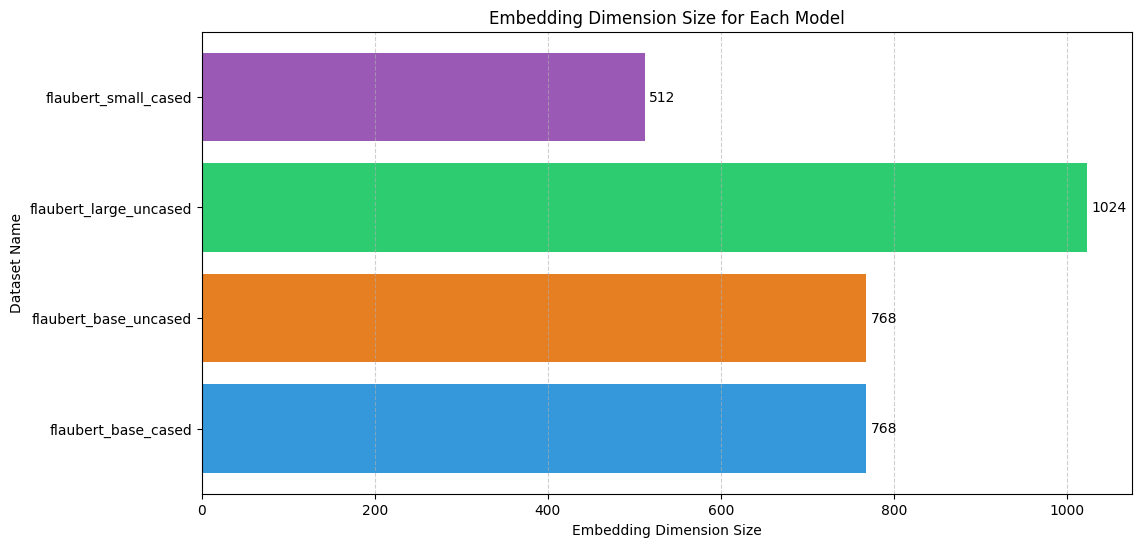

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing  French Adjectives Original Gender Distribution:


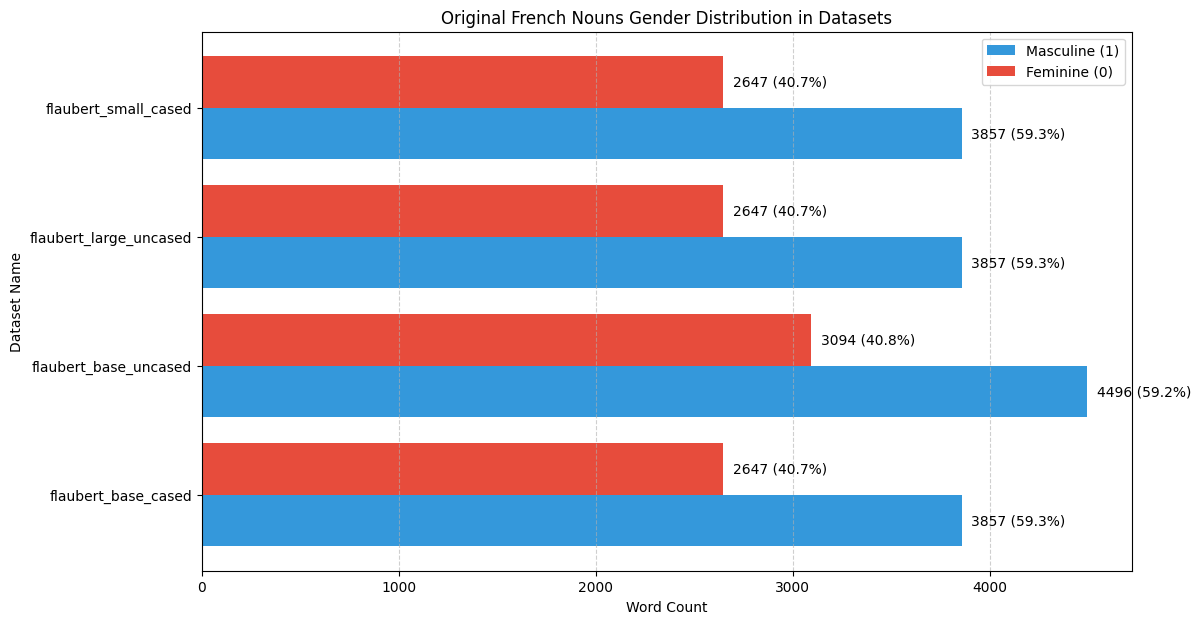

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing  French Adjectives Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Adjectives Gender Distribution After Undersampling:


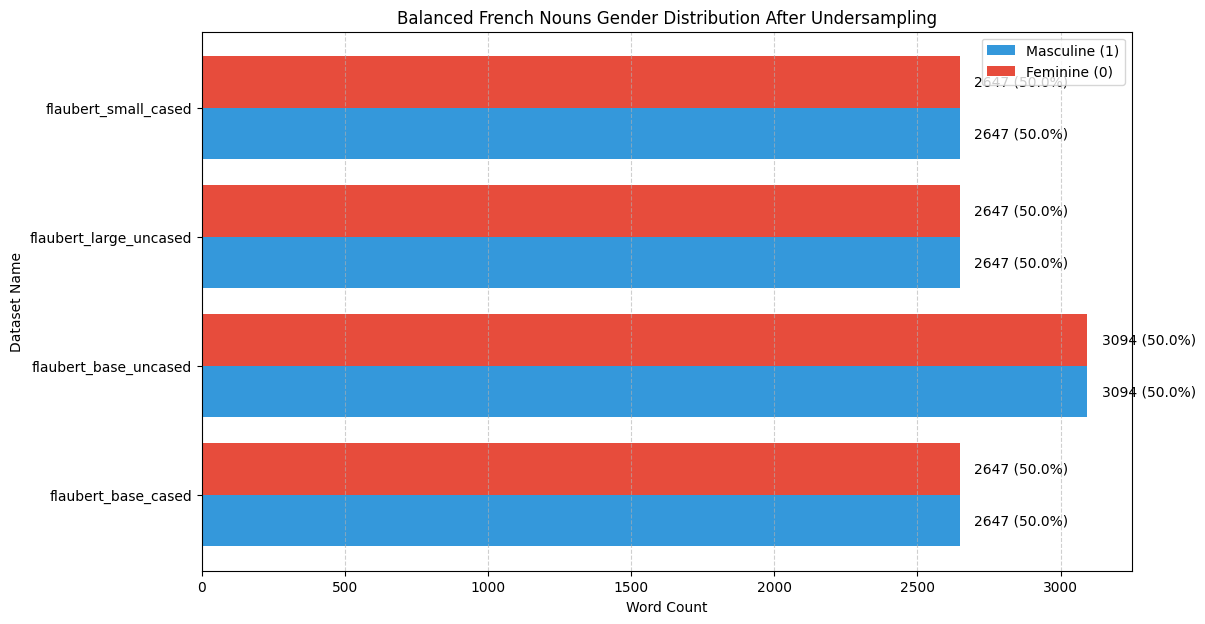

In [ ]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Adjectives Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Multilayerr Perceptron (MLP) (Baseline on all Embeddings)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 100  # Change this to any value between 1 and 100

# Dictionaries to store models, performance, loss curves, and timing
model_accuracies = {}
training_accuracies = {}
trained_models = {}
test_data = {}
loss_curves = {}
training_times = {}

# Loop through each dataset and train an MLP model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining MLP Model on {name} Dataset...")

    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values
        y = df["Gender"].values
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    if len(df) < 2:
        print(f"{name} dataset is too small, skipping...")
        continue

    if dataset_percentage < 100:
        X_sample, _, y_sample, _ = train_test_split(
            X, y,
            train_size=dataset_percentage / 100,
            stratify=y,
            random_state=42
        )
    else:
        X_sample = X
        y_sample = y

    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        stratify=y_sample,
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize model
    mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    max_iter=300,
    solver='sgd',          # or try 'sgd' with momentum
    learning_rate_init=0.001, # slight reduction if using adam
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    alpha=0.1,
    random_state=42,
)


    # Time the training
    start_time = time.time()
    mlp.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed = end_time - start_time
    training_times[name] = elapsed  # <-- Store training time

    # Store results
    trained_models[name] = mlp
    test_data[name] = (X_test_scaled, y_test)
    loss_curves[name] = mlp.loss_curve_

    # Evaluate
    train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))

    training_accuracies[name] = train_acc
    model_accuracies[name] = test_acc

    print(f"\nTraining Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Training Time: {elapsed:.2f} seconds")
    print(classification_report(y_test, mlp.predict(X_test_scaled), target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training MLP Model on flaubert_base_cased Dataset...

Training Accuracy: 0.9410
Testing Accuracy: 0.8194
Training Time: 5.39 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.79      0.75      0.77       529
Masculine (1)       0.84      0.87      0.85       772

     accuracy                           0.82      1301
    macro avg       0.81      0.81      0.81      1301
 weighted avg       0.82      0.82      0.82      1301

----------------------------------------------------------------------

Training MLP Model on flaubert_base_uncased Dataset...

Training Accuracy: 0.7658
Testing Accuracy: 0.6634
Training Time: 2.40 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.64      0.41      0.50       619
Masculine (1)       0.67      0.84      0.75       899

     accuracy                           0.66      1518
    macro avg       0.65      0.6

### 3.1 Evaluate Performance of MLP (on all available embeddings)

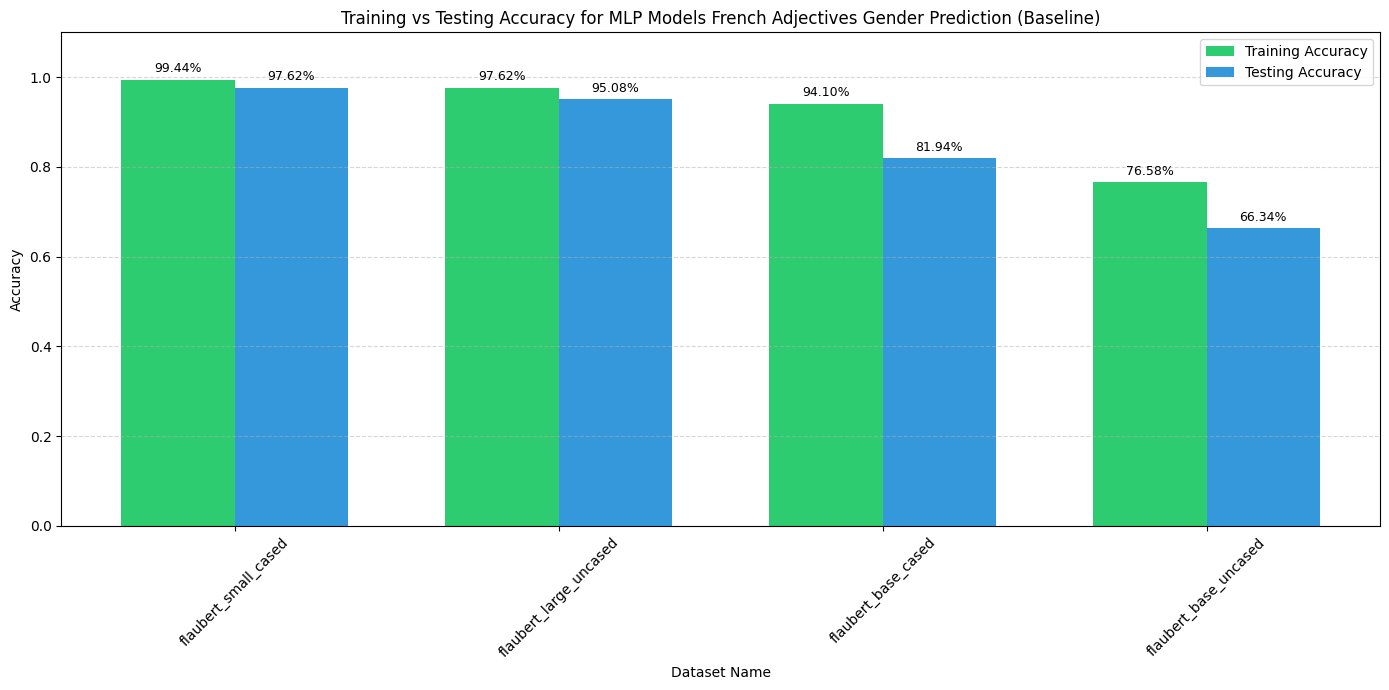

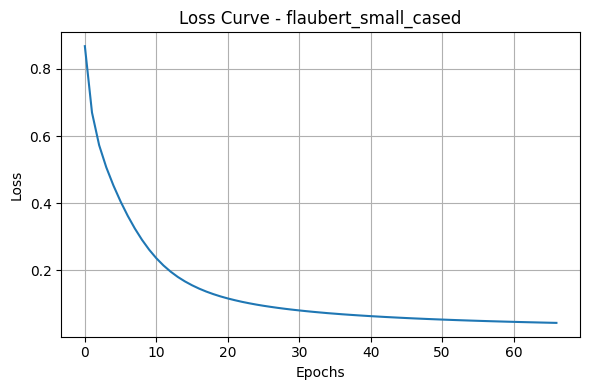

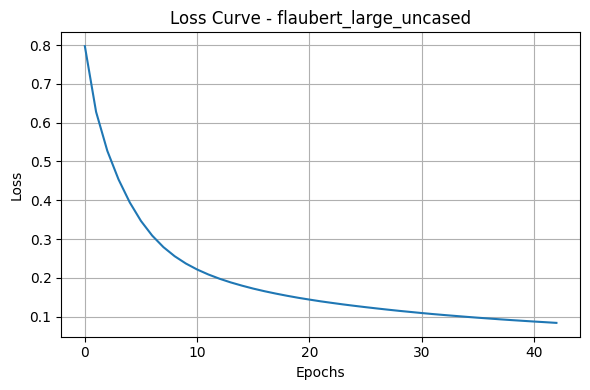

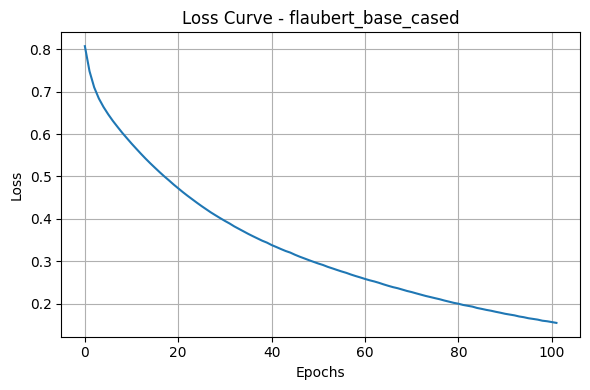

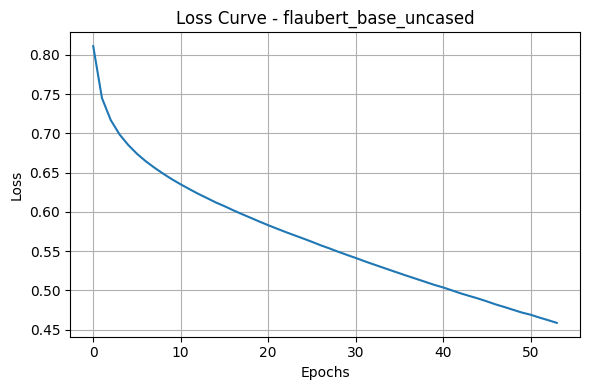

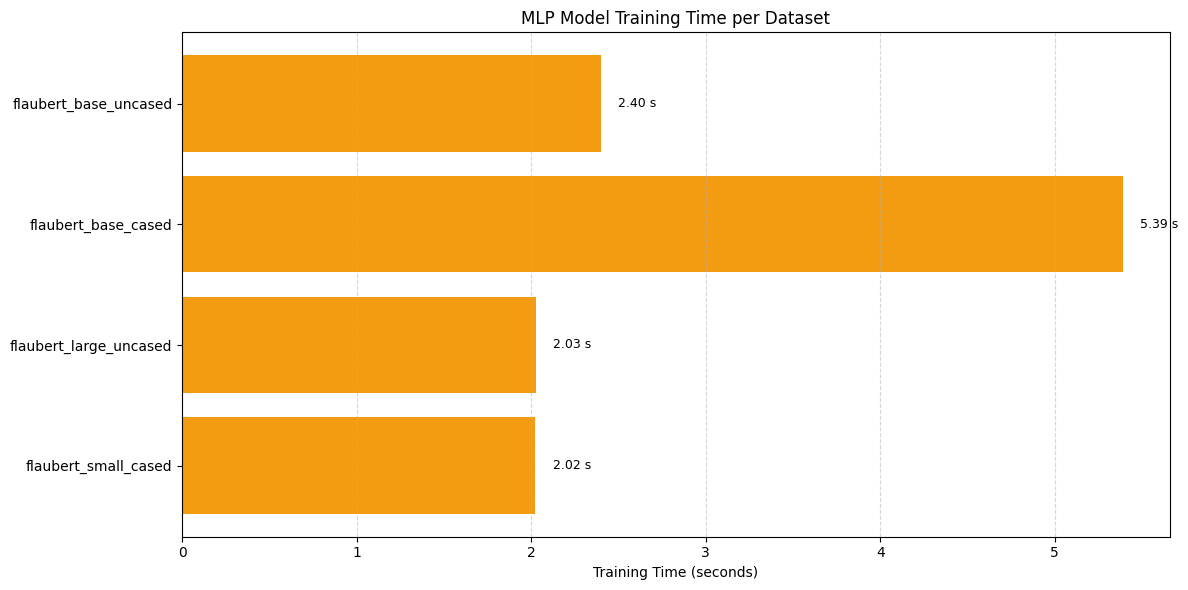

In [ ]:
# Sort models by test accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, test_accs = zip(*sorted_models)
train_accs = [training_accuracies[name] for name in model_names]

# Accuracy Bar Chart
import matplotlib.pyplot as plt

x = range(len(model_names))
bar_width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x, train_accs, width=bar_width, label='Training Accuracy', color='#2ecc71')
plt.bar([i + bar_width for i in x], test_accs, width=bar_width, label='Testing Accuracy', color='#3498db')

for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    plt.text(i, train + 0.01, f"{train:.2%}", ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width, test + 0.01, f"{test:.2%}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Dataset Name")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy for MLP Models French Adjectives Gender Prediction (Baseline)")
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot loss curves
for name in model_names:
    if loss_curves.get(name):
        plt.figure(figsize=(6, 4))
        plt.plot(loss_curves[name])
        plt.title(f"Loss Curve - {name}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot training times
times = [training_times[name] for name in model_names]

plt.figure(figsize=(12, 6))
plt.barh(model_names, times, color="#f39c12")
for i, t in enumerate(times):
    plt.text(t + 0.1, i, f"{t:.2f} s", va="center", fontsize=9)
plt.xlabel("Training Time (seconds)")
plt.title("MLP Model Training Time per Dataset")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 2698it [3:14:57,  4.34s/it]                               



--- SHAP Feature Importance Plot for flaubert_base_cased ---


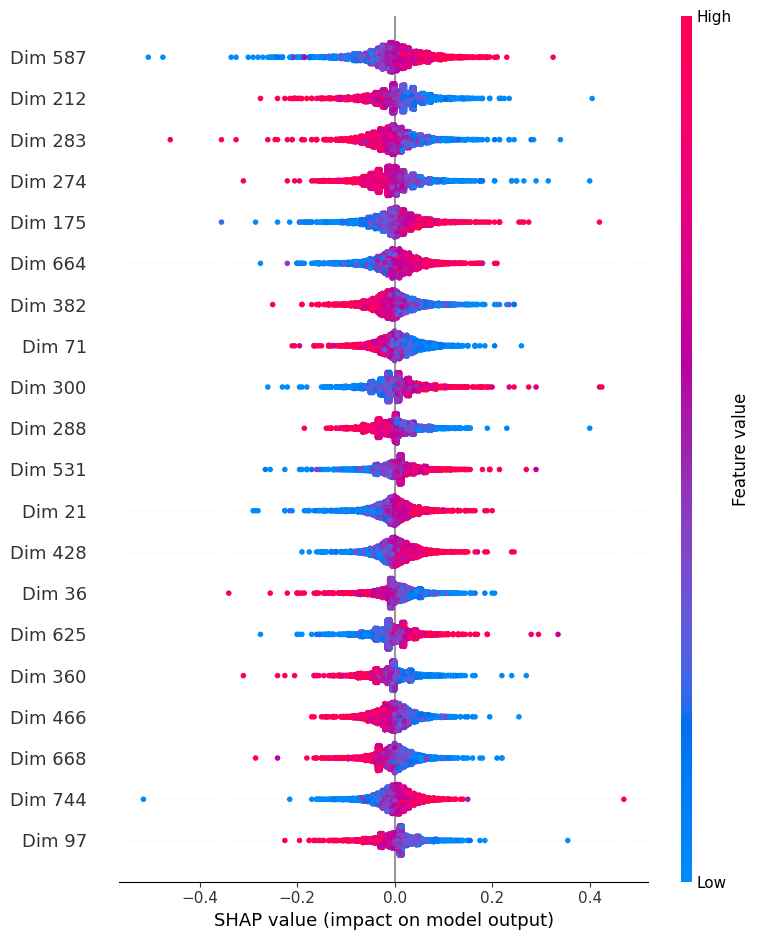


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 3302it [2:04:41,  2.27s/it]                            



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


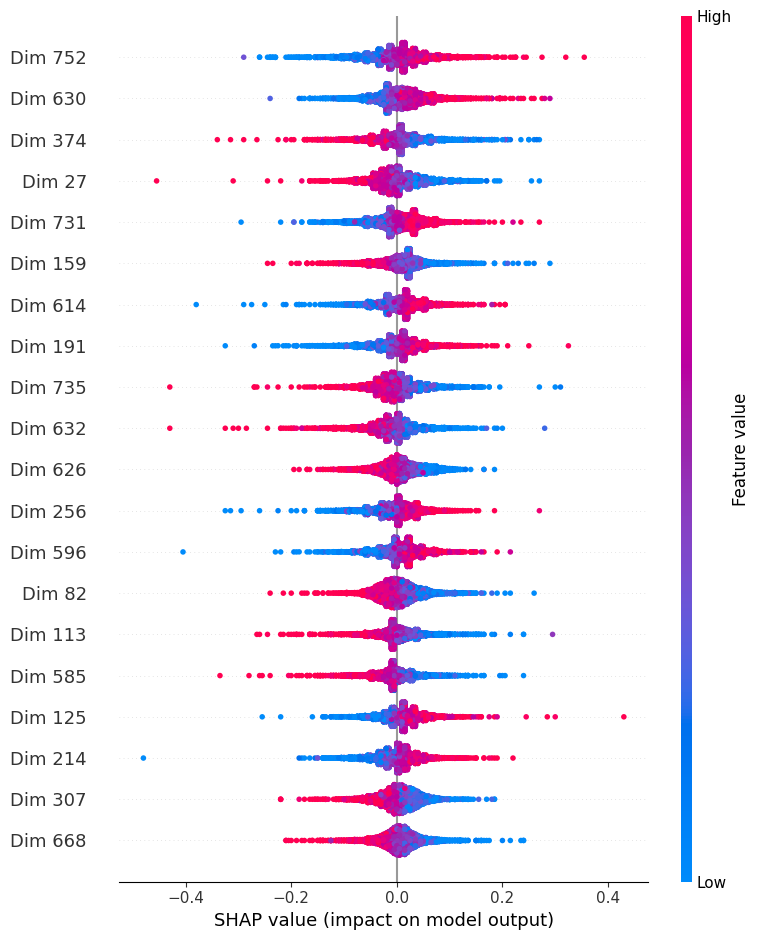


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 2698it [3:18:20,  4.42s/it]                            



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


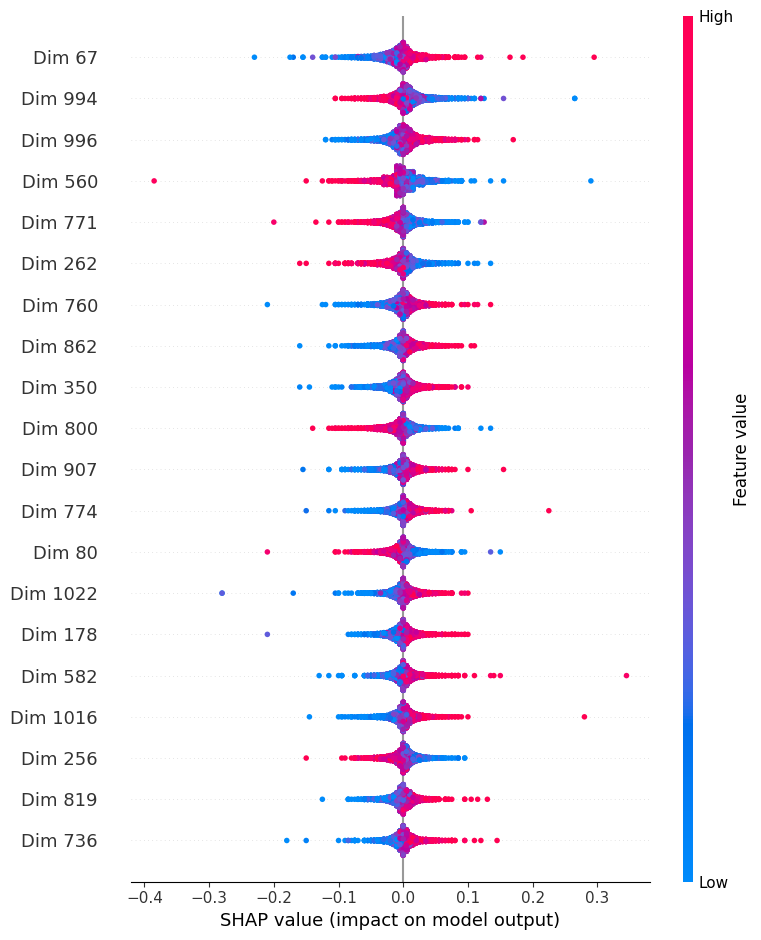


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 2698it [44:46,  1.00it/s]                          



--- SHAP Feature Importance Plot for flaubert_small_cased ---


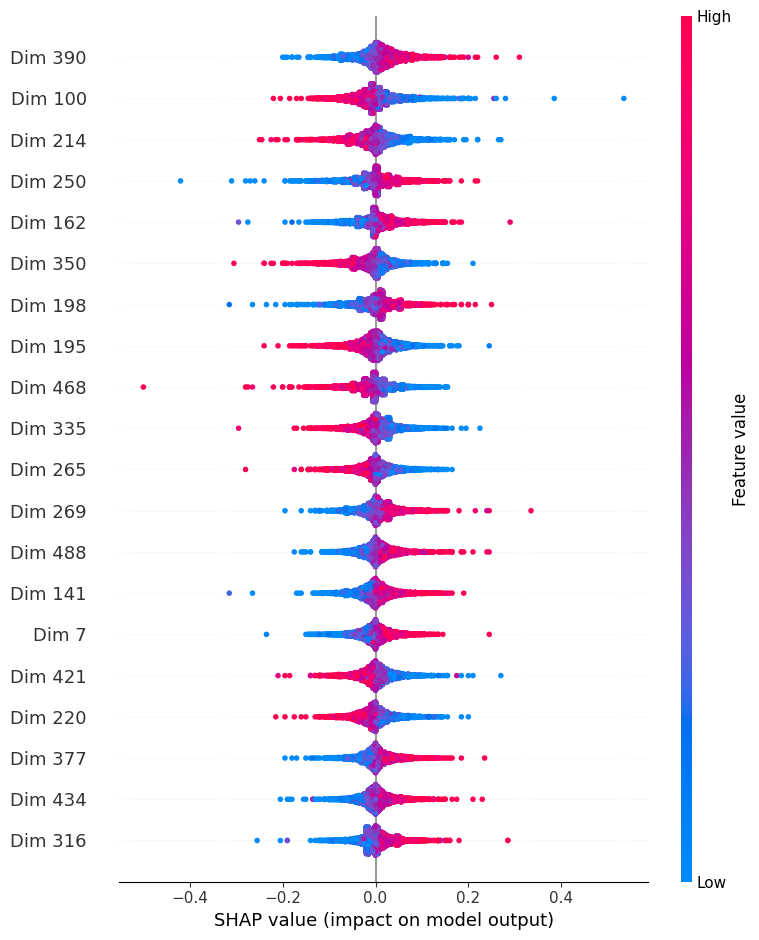

In [ ]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [ ]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "mlp_adjectives_shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features


NameError: name 'shap_feature_dict' is not defined

# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% [1, 5, 10, 25, 50, 75, 100] Features from SHAP Importance

In [ ]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("mlp_adjectives_shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each MLP model
top_features_dict = {}

# Define top SHAP feature selection percentages
percentages = [1, 5, 10, 25, 50, 75, 100]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Top SHAP Features for MLP Model: {model_name} ---")

    # Get the total number of features available
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different SHAP value thresholds
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)
        selected_features = sorted_features["Feature"].head(num_features).tolist()
        top_features_dict[model_name][percent] = selected_features

print("\n--- SHAP-based Feature Selection for MLP Models Completed ---")



--- Selecting Top SHAP Features for MLP Model: flaubert_base_cased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_base_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_large_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_small_cased ---

--- SHAP-based Feature Selection for MLP Models Completed ---


### 5.2 Retrain MLP Using Top N% SHAP Features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Output dictionaries
new_model_accuracies = {}
new_model_training_accuracies = {}
new_trained_models = {}
new_test_data = {}
new_loss_curves = {}
new_training_times = {}

# Loop through models and selected SHAP-based feature subsets
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining MLP for {model_name} ---")

    # Get the full dataframe
    if model_name not in dataframes:
        print(f" Skipping {model_name} — DataFrame not found.")
        continue

    df = dataframes[model_name]
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f" Skipping {model_name} — Required columns missing.")
        continue

    # Full feature matrix
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"]
    X_full.columns = X_full.columns.astype(str)  # Ensure string column names

    for percent in percentages:
        if percent not in feature_sets:
            print(f" Skipping {percent}% for {model_name} — not available in SHAP selection.")
            continue

        selected_features = feature_sets[percent]
        selected_indices = [int(f.split(" ")[1]) for f in selected_features]
        selected_columns = [str(idx) for idx in selected_indices]

        print(f"\n--- Training with Top {percent}% Features ---")

        # Only use features present in dataset
        valid_columns = [col for col in selected_columns if col in X_full.columns]
        if not valid_columns:
            print(f"Skipping Top {percent}% for {model_name} — No valid columns found.")
            continue

        X_selected = X_full[valid_columns].values

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=(32, 16),
            max_iter=300,
            solver='sgd',
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10,
            alpha=0.1,
            random_state=42,
        )

        start_time = time.time()
        mlp.fit(X_train_scaled, y_train)
        elapsed = time.time() - start_time

        # Save outputs
        new_trained_models[(model_name, percent)] = mlp
        new_training_times[(model_name, percent)] = elapsed
        new_test_data[(model_name, percent)] = (X_test_scaled, y_test)
        new_loss_curves[(model_name, percent)] = getattr(mlp, 'loss_curve_', None)

        train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
        new_model_training_accuracies[(model_name, percent)] = train_acc
        new_model_accuracies[(model_name, percent)] = test_acc

        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy: {test_acc:.4f}")
        print(f"Training Time: {elapsed:.2f} seconds")
        print(classification_report(y_test, mlp.predict(X_test_scaled), target_names=["Feminine (0)", "Masculine (1)"]))

print("\n--- Retraining Completed ---")



--- Retraining MLP for flaubert_base_cased ---

--- Training with Top 1% Features ---
Training Accuracy: 0.5862
Testing Accuracy: 0.5796
Training Time: 0.49 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.44      0.12      0.19       529
Masculine (1)       0.60      0.89      0.72       772

     accuracy                           0.58      1301
    macro avg       0.52      0.51      0.45      1301
 weighted avg       0.53      0.58      0.50      1301


--- Training with Top 5% Features ---
Training Accuracy: 0.6269
Testing Accuracy: 0.6126
Training Time: 1.43 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.54      0.29      0.38       529
Masculine (1)       0.63      0.83      0.72       772

     accuracy                           0.61      1301
    macro avg       0.59      0.56      0.55      1301
 weighted avg       0.60      0.61      0.58      1301


--- Training with Top 10% Features ---
Training A

# 6) Random Forest Feature Importance

## 6.1) Compute Random Forest Feature Importance

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

rf_importances = {}

total_models = len(dataframes)
print(f"Starting RF feature importance extraction for {total_models} models.")

for i, (name, df) in enumerate(dataframes.items(), 1):
    print(f"\n[{i}/{total_models}] Computing RF importances for: {name}")
    start_time = time.time()
    drop_cols = ["Gender"]
    if "Word" in df.columns:
        drop_cols.append("Word")
    X = df.drop(columns=drop_cols)
    y = df["Gender"].values

    rf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    importances = rf.feature_importances_

    # Create DataFrame and sort so most important features are at the top
    feat_imp_df = pd.DataFrame({
        "feature": X.columns,
        "importance": importances
    }).sort_values("importance", ascending=False).reset_index(drop=True)

    feat_imp_csv = f"{name}_mlp_french_adjectives_rf_feature_importances.csv"
    feat_imp_df.to_csv(feat_imp_csv, index=False)
    elapsed = time.time() - start_time
    print(f"  - Saved sorted feature importances to {feat_imp_csv}")
    print(f"  - Time elapsed: {elapsed:.2f} seconds.")

    rf_importances[name] = importances  # For quick access if needed later

print("\nAll models processed. Feature importance files created.")


Starting RF feature importance extraction for 4 models.

[1/4] Computing RF importances for: flaubert_base_cased
  - Saved sorted feature importances to flaubert_base_cased_mlp_french_adjectives_rf_feature_importances.csv
  - Time elapsed: 29.22 seconds.

[2/4] Computing RF importances for: flaubert_base_uncased
  - Saved sorted feature importances to flaubert_base_uncased_mlp_french_adjectives_rf_feature_importances.csv
  - Time elapsed: 29.21 seconds.

[3/4] Computing RF importances for: flaubert_large_uncased
  - Saved sorted feature importances to flaubert_large_uncased_mlp_french_adjectives_rf_feature_importances.csv
  - Time elapsed: 30.76 seconds.

[4/4] Computing RF importances for: flaubert_small_cased
  - Saved sorted feature importances to flaubert_small_cased_mlp_french_adjectives_rf_feature_importances.csv
  - Time elapsed: 23.63 seconds.

All models processed. Feature importance files created.


## 6.2) Retrain MLP on Top n% Features from RF Importances

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of feature selection percentages to try
feature_selection_percentages = [1, 5, 10, 25, 50, 75, 100]
rf_model_accuracies = {}

total_models = len(dataframes)
print(f"Starting retraining for {total_models} models.")

for i, (name, df) in enumerate(dataframes.items(), 1):
    print("\n" + "-"*60)
    print(f"[{i}/{total_models}] Retraining MLP on RF-selected features for {name}")
    start_time_model = time.time()

    # --- Load sorted RF importances and feature names for this model ---
    feat_imp_df = pd.read_csv(f"{name}_mlp_french_adjectives_rf_feature_importances.csv")
    feature_names = feat_imp_df["feature"].astype(str).values  # ensure string for matching

    # --- Prepare features and labels, ensure column names are string for indexing ---
    drop_cols = ["Gender"]
    if "Word" in df.columns:
        drop_cols.append("Word")
    X = df.drop(columns=drop_cols)
    X.columns = X.columns.astype(str)  # match with feature_names
    y = df["Gender"].values
    n_features = X.shape[1]

    available_percentages = []

    # --- Loop over target feature selection percentages ---
    for pct in feature_selection_percentages:
        k = max(1, int((pct / 100) * n_features))  # how many features to select
        if k < 1:
            print(f"  • {pct}% → selects <1 feature; skipping.")
            continue

        top_features = feature_names[:k]  # top-k most important features (sorted)
        X_sel = X[top_features].values    # select these columns

        # --- Train/test split and scaling ---
        start_time_pct = time.time()
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_sel, y, test_size=0.2, stratify=y, random_state=42
        )
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)

        # --- Train MLP classifier ---
        clf = MLPClassifier(
            hidden_layer_sizes=(32, 16), max_iter=300, solver='sgd',
            learning_rate_init=0.001, early_stopping=True,
            validation_fraction=0.1, n_iter_no_change=10, alpha=0.1, random_state=42
        )
        clf.fit(X_tr, y_tr)

        # --- Evaluate and print results ---
        y_pred = clf.predict(X_te)
        acc = accuracy_score(y_te, y_pred)
        rf_model_accuracies[(name, pct)] = acc
        elapsed_pct = time.time() - start_time_pct
        available_percentages.append(pct)
        print(f"  • RF Top {pct}% ({k} dims): acc={acc:.4f} ({elapsed_pct:.2f}s)")
        print(classification_report(
            y_te, y_pred,
            target_names=["Feminine (0)", "Masculine (1)"]
        ))

    elapsed_model = time.time() - start_time_model
    print(f"Total time for {name}: {elapsed_model:.2f} seconds.")

    # --- Print concise summary for this model ---
    print("Summary for", name)
    for pct in available_percentages:
        acc = rf_model_accuracies[(name, pct)]
        print(f"  - Top {pct}% acc: {acc:.4f}")

print("\nAll retraining done. Results printed above.")


Starting retraining for 4 models.

------------------------------------------------------------
[1/4] Retraining MLP on RF-selected features for flaubert_base_cased
  • RF Top 1% (7 dims): acc=0.6526 (0.37s)
               precision    recall  f1-score   support

 Feminine (0)       0.61      0.40      0.48       529
Masculine (1)       0.67      0.83      0.74       772

     accuracy                           0.65      1301
    macro avg       0.64      0.61      0.61      1301
 weighted avg       0.64      0.65      0.63      1301

  • RF Top 5% (38 dims): acc=0.6749 (0.51s)
               precision    recall  f1-score   support

 Feminine (0)       0.66      0.41      0.51       529
Masculine (1)       0.68      0.85      0.76       772

     accuracy                           0.67      1301
    macro avg       0.67      0.63      0.63      1301
 weighted avg       0.67      0.67      0.66      1301

  • RF Top 10% (76 dims): acc=0.7463 (2.20s)
               precision    recall  f

#7) Classification Accuracy Comparison: Baseline vs SHAP vs RF vs Ekaterina

Top N% to test: 1, 5, 10, 25, 50, 75, 100 (Baseline)

In [ ]:
import pandas as pd
import numpy as np
import pickle
from IPython.display import display

# -- Step 1: Load Ekaterina results (as you already do) --
EKA_ACC_PATH = "/content/gender_adj_accs.pickle"
with open(EKA_ACC_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {
    "flau_small_c": "flaubert_small_cased",
    "flau_base_c":  "flaubert_base_cased",
    "flau_base_u":  "flaubert_base_uncased",
    "flau_large_c": "flaubert_large_uncased",
}
thresholds = [1, 5, 10, 25, 50, 75, 100]

eka_model_accuracies = {}
for short, pretty in model_map.items():
    for p in thresholds:
        if p == 100:
            key = "All dims"
        else:
            key = f"Perc{p}"
        if key in ek_raw[short]:
            vals = ek_raw[short][key]
            eka_model_accuracies[(pretty, p)] = float(np.mean(vals))

# -- Step 2: Helper fetch function --
def fetch(d, m, p=None):
    return d.get(m) if p is None else d.get((m, p))

# -- Step 3: Collect all model names from your mapping --
all_models = sorted(model_map.values())
methods = ["SHAP", "RF", "EKA"]
rows = [f"{p}%" for p in thresholds]
cols = pd.MultiIndex.from_product([all_models, methods])

acc_table = pd.DataFrame(index=rows, columns=cols, dtype=object)

for m in all_models:
    for p in thresholds:
        row = f"{p}%"
        # SHAP (from your new_model_accuracies, keys=(model, pct))
        val = fetch(new_model_accuracies, m, p)
        acc_table.loc[row, (m, "SHAP")] = f"{val*100:.1f}" if val is not None else "–"
        # RF (from your rf_model_accuracies, keys=(model, pct))
        val = fetch(rf_model_accuracies, m, p)
        acc_table.loc[row, (m, "RF")] = f"{val*100:.1f}" if val is not None else "–"
        # EKA
        val = fetch(eka_model_accuracies, m, p)
        acc_table.loc[row, (m, "EKA")] = f"{val*100:.1f}" if val is not None else "–"

print("ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###")
display(acc_table)


ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###


flaubert_base_cased             flaubert_base_uncased              \
                    SHAP    RF   EKA                  SHAP    RF   EKA   
1%                  58.0  65.3  60.8                  58.4  62.0  55.9   
5%                  61.3  67.5  63.6                  57.0  64.2  57.6   
10%                 71.5  74.6  64.6                  60.9  64.4  58.0   
25%                 77.5  75.6  64.1                  64.8  64.6  58.3   
50%                 80.3  81.0  62.2                  64.6  60.3  57.0   
75%                 81.9  80.6  60.2                  67.9  63.6  55.8   
100%                81.9  81.9  58.4                  67.9  65.8  54.6   

     flaubert_large_uncased             flaubert_small_cased              
                       SHAP    RF   EKA                 SHAP    RF   EKA  
1%                     71.6  84.3  77.4                 71.1  77.6  72.1  
5%                     83.1  92.2  89.4                 90.7  89.9  88.1  
10%                    90.9  93.3  91.2                 94.2  93.6  91.1  
25%                    93.4  93.7  92.7                 97.5  95.7  93.3  
50%                    95.0  94.1  92.6                 97.2  97.3  94.0  
75%                    94.7  95.1  92.2                 97.2  97.8  93.3  
100%                   94.5  94.4  91.3                 97.2  97.7  92.0

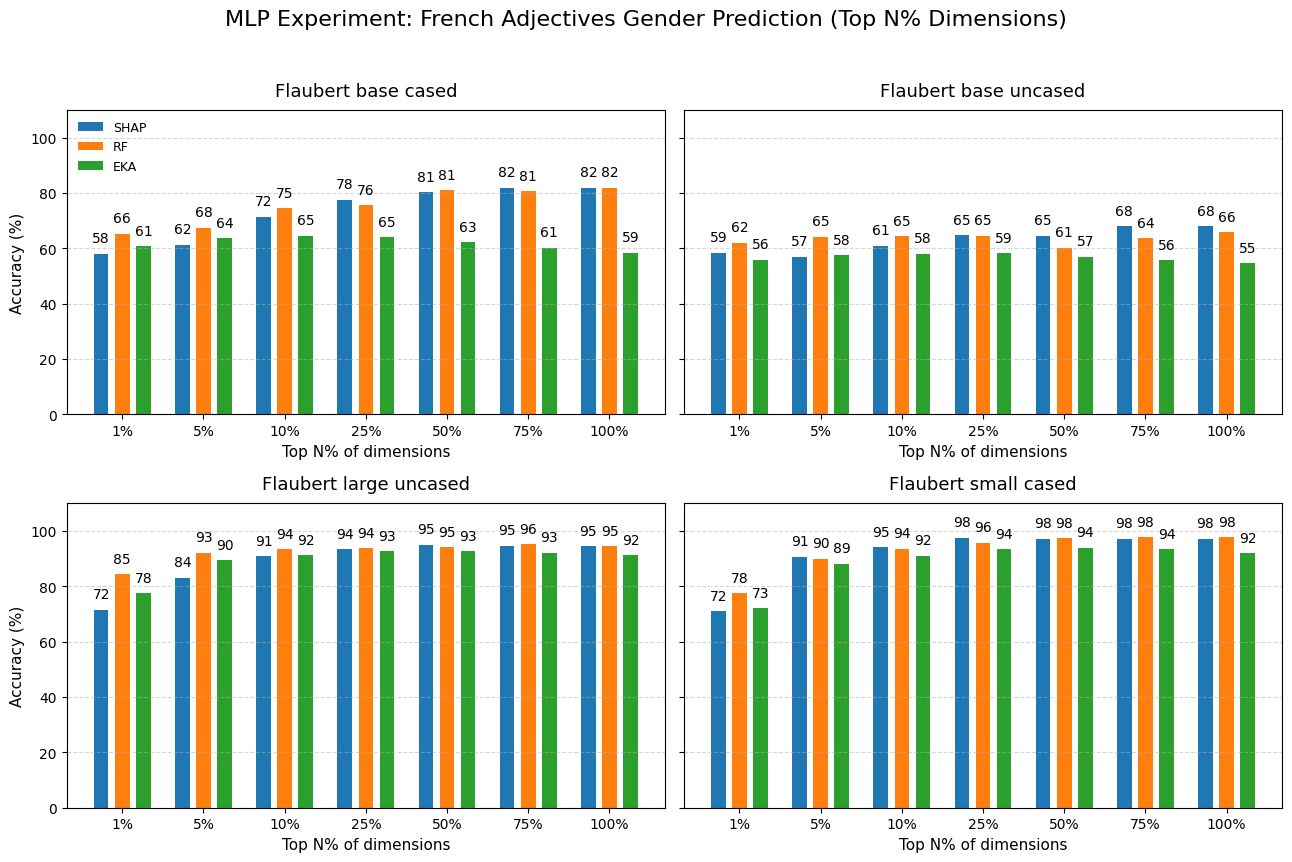

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper: prettify model names
def prettify(name):
    return name.replace("_", " ").capitalize()

# Convert table entries to float for plotting (nan for missing)
acc_numeric = acc_table.copy()
for col in acc_numeric.columns:
    acc_numeric[col] = acc_numeric[col].apply(lambda x: float(x) if x not in ["–", None, np.nan] else np.nan)
acc_numeric.index = [int(x.rstrip("%")) for x in acc_numeric.index]

bar_width = 0.18
bar_gap = 0.08
x = np.arange(len(acc_numeric.index))

n_models = len(all_models)
ncols = 2
nrows = int(np.ceil(n_models / ncols))

# Make the figure slightly taller for more compact yet readable layout
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, nrows*4.2), sharex=True, sharey=True)
axes = axes.flatten()

for idx, model in enumerate(all_models):
    ax = axes[idx]
    n_methods = len(methods)
    total_width = n_methods * bar_width + (n_methods-1)*bar_gap
    for i, method in enumerate(methods):
        col = (model, method)
        accs = acc_numeric[col].values
        bar_pos = x - (total_width/2) + i*(bar_width + bar_gap) + bar_width/2
        bars = ax.bar(bar_pos, accs, width=bar_width, label=method)
        for rect in bars:
            height = rect.get_height()
            if not np.isnan(height):
                rounded = np.ceil(height)  # round UP
                ax.annotate(f'{rounded:.0f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 6),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{k}%" for k in acc_numeric.index], fontsize=10)
    ax.tick_params(axis='x', labelbottom=True)
    ax.set_xlabel("Top N% of dimensions", fontsize=11)
    ax.set_title(prettify(model), fontsize=13, pad=10)
    ax.set_ylim(0, 110)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    if idx % ncols == 0:
        ax.set_ylabel("Accuracy (%)", fontsize=11)
    if idx == 0:
        ax.legend(fontsize=9, frameon=False, loc="upper left")

# Hide unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("MLP Experiment: French Adjectives Gender Prediction (Top N% Dimensions)", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.99], pad=1.0, h_pad=1.2)
plt.show()


#8) Shared Dimensions Comparison: SHAP vs RF vs Ekaterina

In [ ]:
import pandas as pd, math, pickle, re
from IPython.display import display

# ----- SET FILE PATHS -----
SHAP_PATH = "/content/mlp_adjectives_shap_feature_importance_all_models.csv"
EKA_PATH  = "/content/gender_adj_dims.pickle"
RF_PATHS = {
    "flaubert_small_cased":   "/content/flaubert_small_cased_mlp_french_adjectives_rf_feature_importances.csv",
    "flaubert_base_cased":    "/content/flaubert_base_cased_mlp_french_adjectives_rf_feature_importances.csv",
    "flaubert_base_uncased":  "/content/flaubert_base_uncased_mlp_french_adjectives_rf_feature_importances.csv",
    "flaubert_large_uncased": "/content/flaubert_large_uncased_mlp_french_adjectives_rf_feature_importances.csv",
}

# ----- LOAD SHAP CSV -----
shap = pd.read_csv(SHAP_PATH)
if "Feature" not in shap.columns:
    shap.rename(columns={shap.columns[0]: "Feature"}, inplace=True)
shap["Feature"] = shap["Feature"].astype(str).str.strip()

def find_col(df, model_name):
    targ = re.sub(r"[^\w]", "", model_name.lower())
    for col in df.columns:
        txt = "".join(col) if isinstance(col, tuple) else str(col)
        if targ in re.sub(r"[^\w]", "", txt.lower()):
            return col
    raise KeyError(f"Column for “{model_name}” not found")

# ----- LOAD EKATERINA PICKLE -----
with open(EKA_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {
    "flaubert_small_cased":   "flau_small_c",
    "flaubert_base_cased":    "flau_base_c",
    "flaubert_base_uncased":  "flau_base_u",
    "flaubert_large_uncased": "flau_large_c",
}
embed_size = {
    "flaubert_small_cased":   512,
    "flaubert_base_cased":    768,
    "flaubert_base_uncased":  768,
    "flaubert_large_uncased": 1024,
}
thresholds = [1, 5, 10, 25, 50, 75, 100]

# --- BUILD Ekaterina’s *union per percentage* ---
ek_dims = {m: {p: set() for p in thresholds} for m in model_map}
for m_pretty, m_key in model_map.items():
    mdict = ek_raw[m_key]
    for p in thresholds:
        folds_here = mdict.get(f"Perc{p}", [])
        ek_dims[m_pretty][p] = set().union(*folds_here)

# --- MAIN LOOP ---
results = {}
for model in model_map:
    # SHAP dims
    S_col = find_col(shap, model)
    s_df = shap[["Feature", S_col]].copy()
    s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
    s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
    s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)

    # RF dims: load from path dictionary
    RF_PATH = RF_PATHS[model]
    rf_df = pd.read_csv(RF_PATH)
    rf_df["dim"] = rf_df["feature"].astype(int)  # columns as ints, already sorted by importance

    tot = embed_size[model]
    results[model] = {}
    for p in thresholds:
        k = math.ceil(tot * p / 100)
        S = set(s_df["dim"].iloc[:k])
        R = set(rf_df["dim"].iloc[:k])
        E = ek_dims[model][p]

        ALL =  S & R & E
        SR  = (S & R) - ALL
        SE  = (S & E) - ALL
        RE  = (R & E) - ALL
        S0  =  S - (R | E)
        R0  =  R - (S | E)
        E0  =  E - (S | R)

        results[model][p] = {
            "Total dims": k,
            "Shared ALL": len(ALL),
            "SHAP∩RF":      len(SR),
            "SHAP∩EKA":     len(SE),
            "RF∩EKA":       len(RE),
            "SHAP only":    len(S0),
            "RF only":      len(R0),
            "EKA only":     len(E0),
        }

# --- DISPLAY ---
for m, tbl in results.items():
    df = pd.DataFrame.from_dict(tbl, orient="index")
    df.index.name = "Top %"
    print("-" * 40)
    print(f"{m}")
    print("-" * 40)
    display(df)


----------------------------------------
flaubert_small_cased
----------------------------------------


,Total dims,Shared ALL,SHAP∩RF,SHAP∩EKA,RF∩EKA,SHAP only,RF only,EKA only
Top %,,,,,,,,
1,6,1,0,0,3,5,2,5
5,26,3,0,3,18,20,5,7
10,52,13,0,1,35,38,4,23
25,128,36,0,18,85,74,7,35
50,256,128,8,44,111,76,9,40
75,384,276,16,69,85,23,7,20
100,512,0,512,0,0,0,0,0


----------------------------------------
flaubert_base_cased
----------------------------------------


,Total dims,Shared ALL,SHAP∩RF,SHAP∩EKA,RF∩EKA,SHAP only,RF only,EKA only
Top %,,,,,,,,
1,8,0,0,0,7,8,1,7
5,39,0,0,4,30,35,9,44
10,77,5,0,13,59,59,13,58
25,192,48,4,47,121,93,19,106
50,384,181,20,113,159,70,24,125
75,576,423,8,139,143,6,2,45
100,768,0,768,0,0,0,0,0


----------------------------------------
flaubert_base_uncased
----------------------------------------


,Total dims,Shared ALL,SHAP∩RF,SHAP∩EKA,RF∩EKA,SHAP only,RF only,EKA only
Top %,,,,,,,,
1,8,1,0,0,7,7,0,12
5,39,2,0,3,30,34,7,41
10,77,12,0,9,55,56,10,88
25,192,54,7,44,112,87,19,149
50,384,183,22,136,162,43,17,158
75,576,441,6,128,128,1,1,61
100,768,0,768,0,0,0,0,0


----------------------------------------
flaubert_large_uncased
----------------------------------------


,Total dims,Shared ALL,SHAP∩RF,SHAP∩EKA,RF∩EKA,SHAP only,RF only,EKA only
Top %,,,,,,,,
1,11,1,0,1,6,9,4,15
5,52,7,1,4,36,40,8,39
10,103,15,1,11,77,76,10,61
25,256,81,6,41,150,128,19,88
50,512,249,19,84,223,160,21,97
75,768,562,22,146,179,38,5,57
100,1024,0,1024,0,0,0,0,0



MODEL: flaubert_small_cased


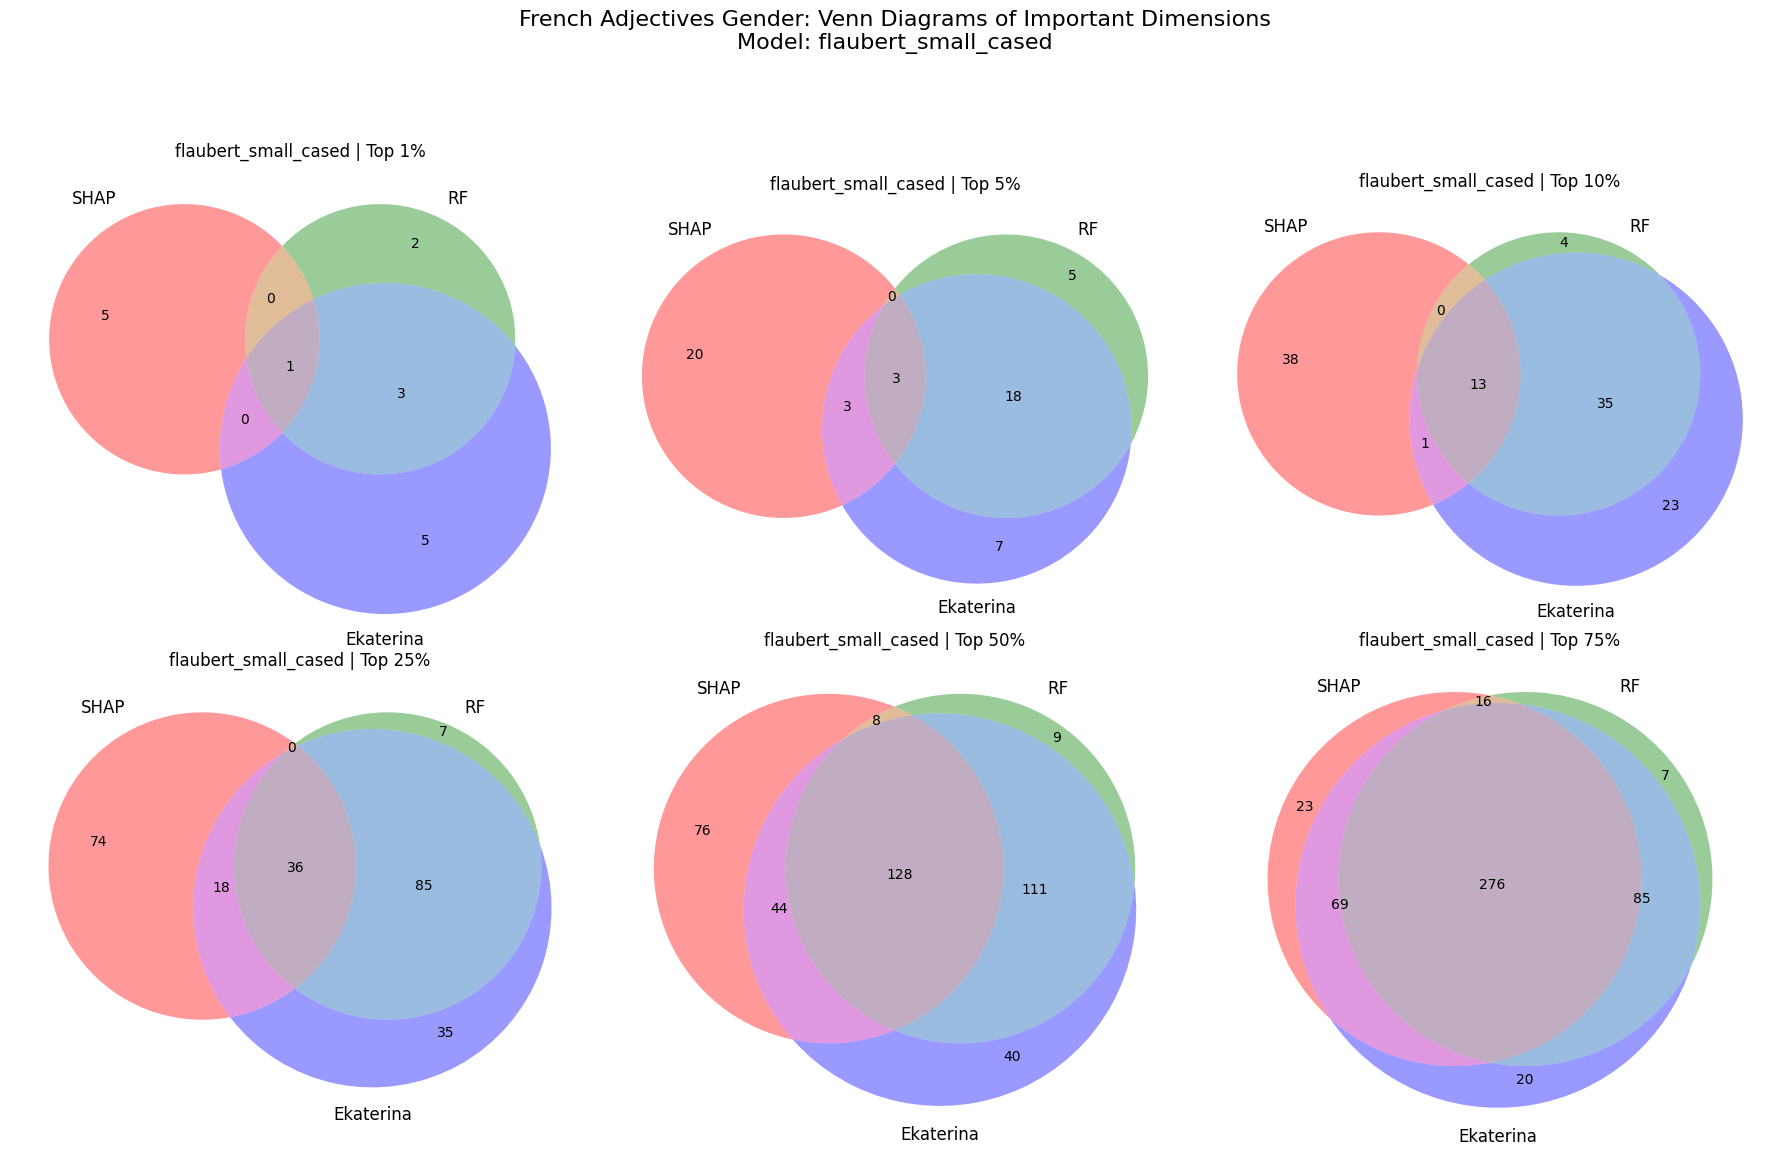


MODEL: flaubert_base_cased


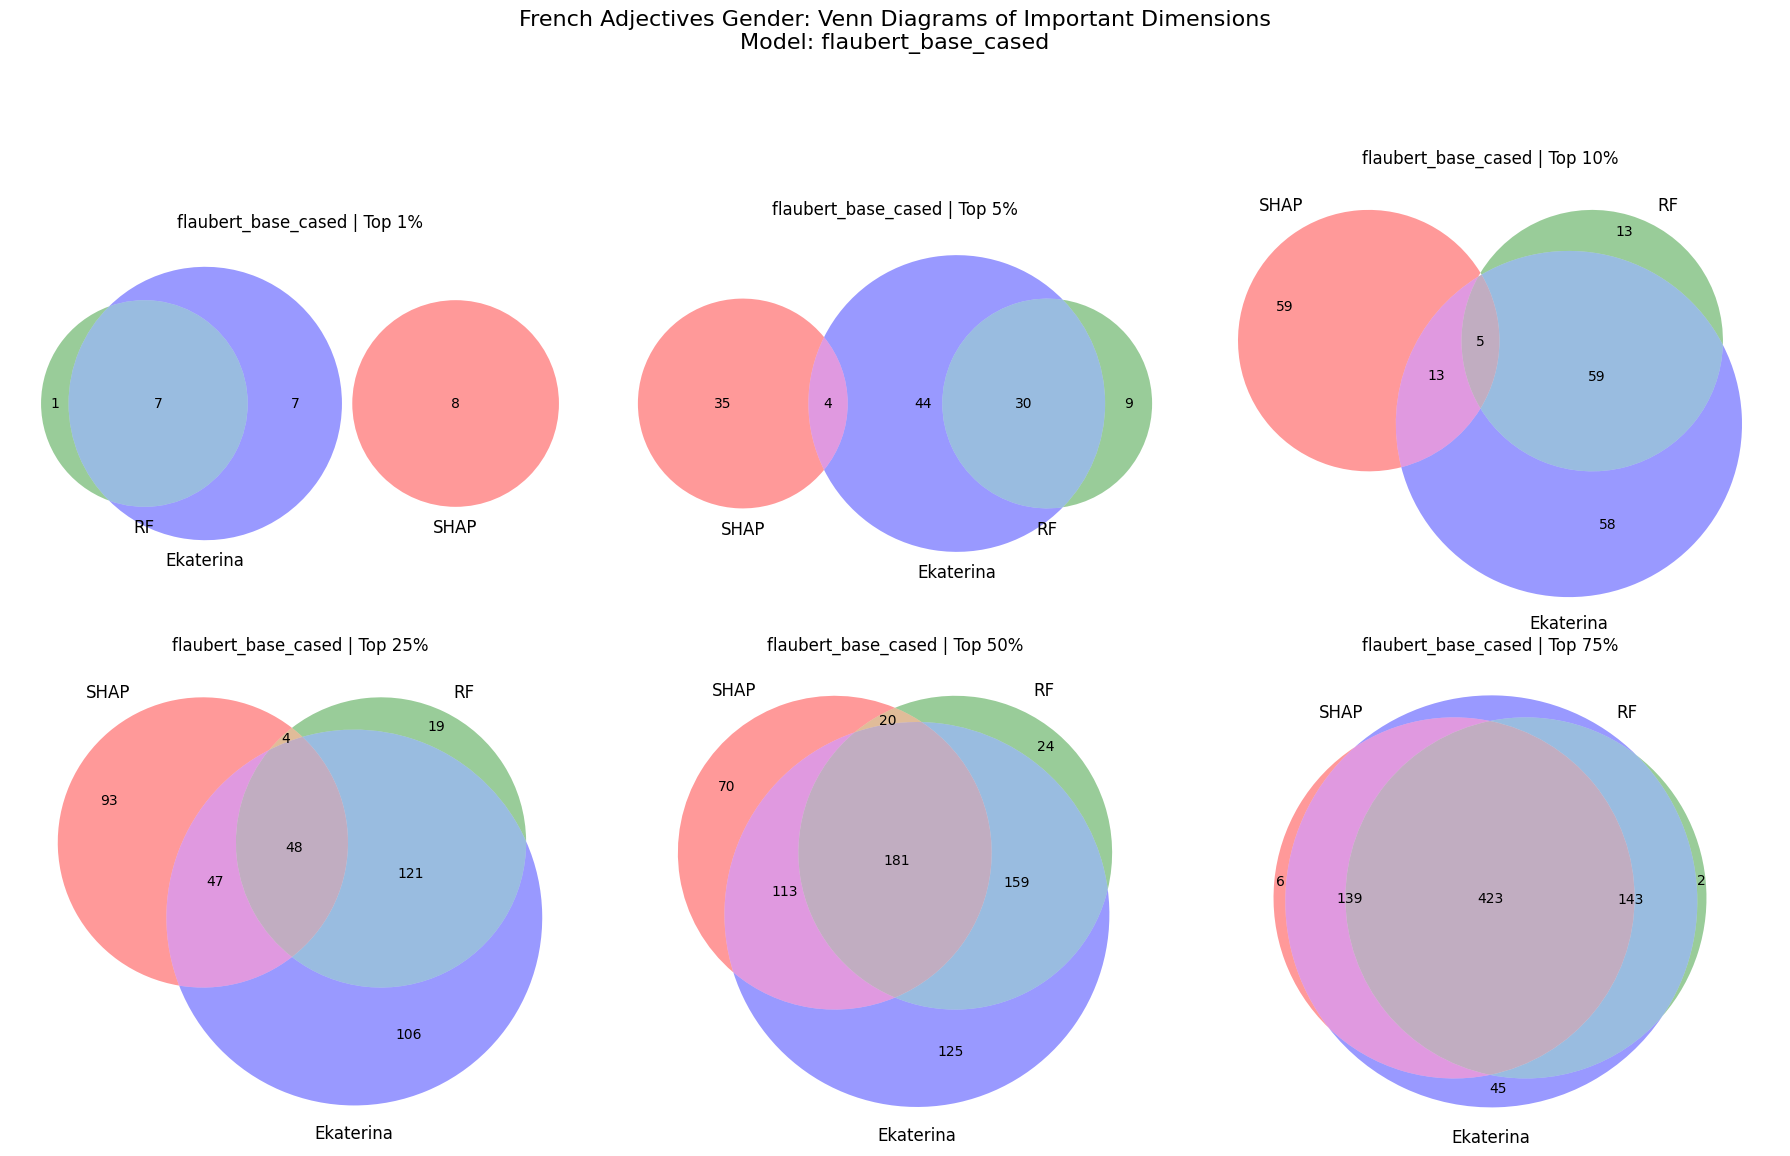


MODEL: flaubert_base_uncased


/usr/local/lib/python3.11/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


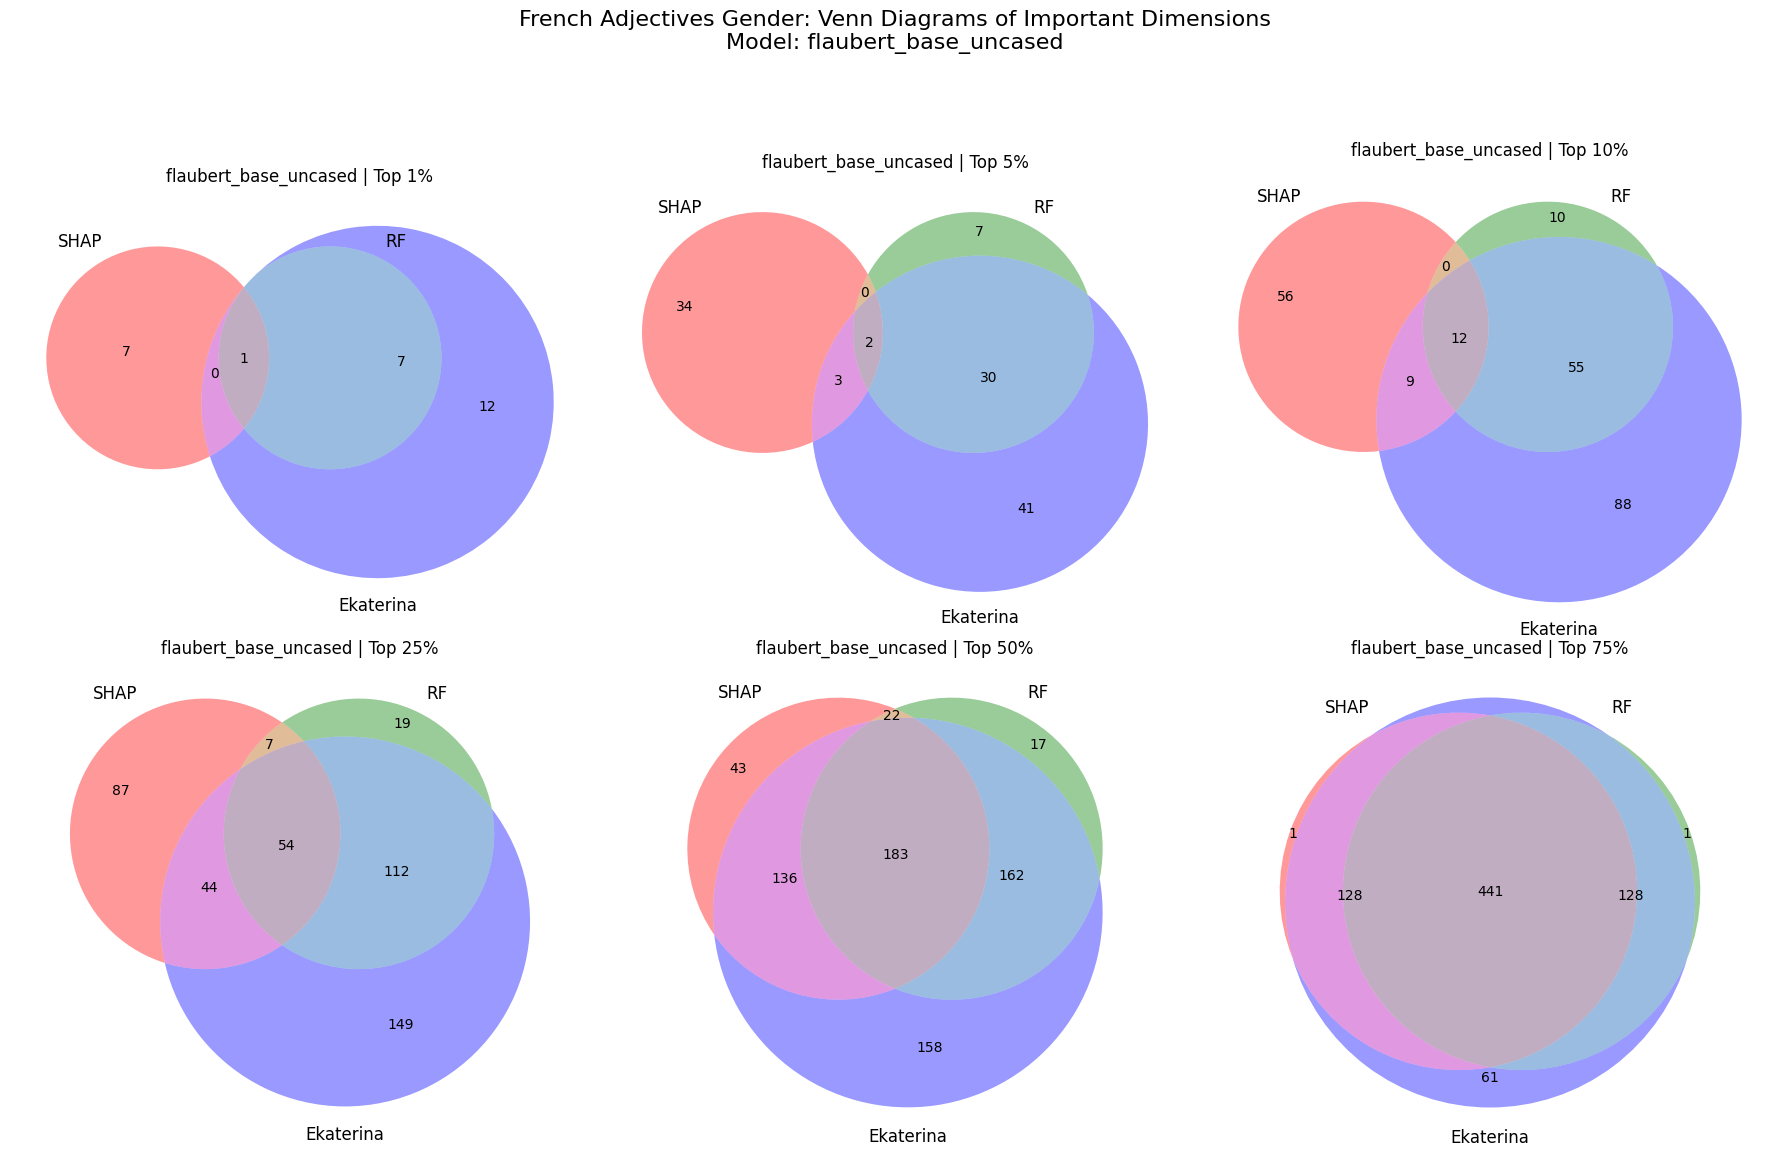


MODEL: flaubert_large_uncased


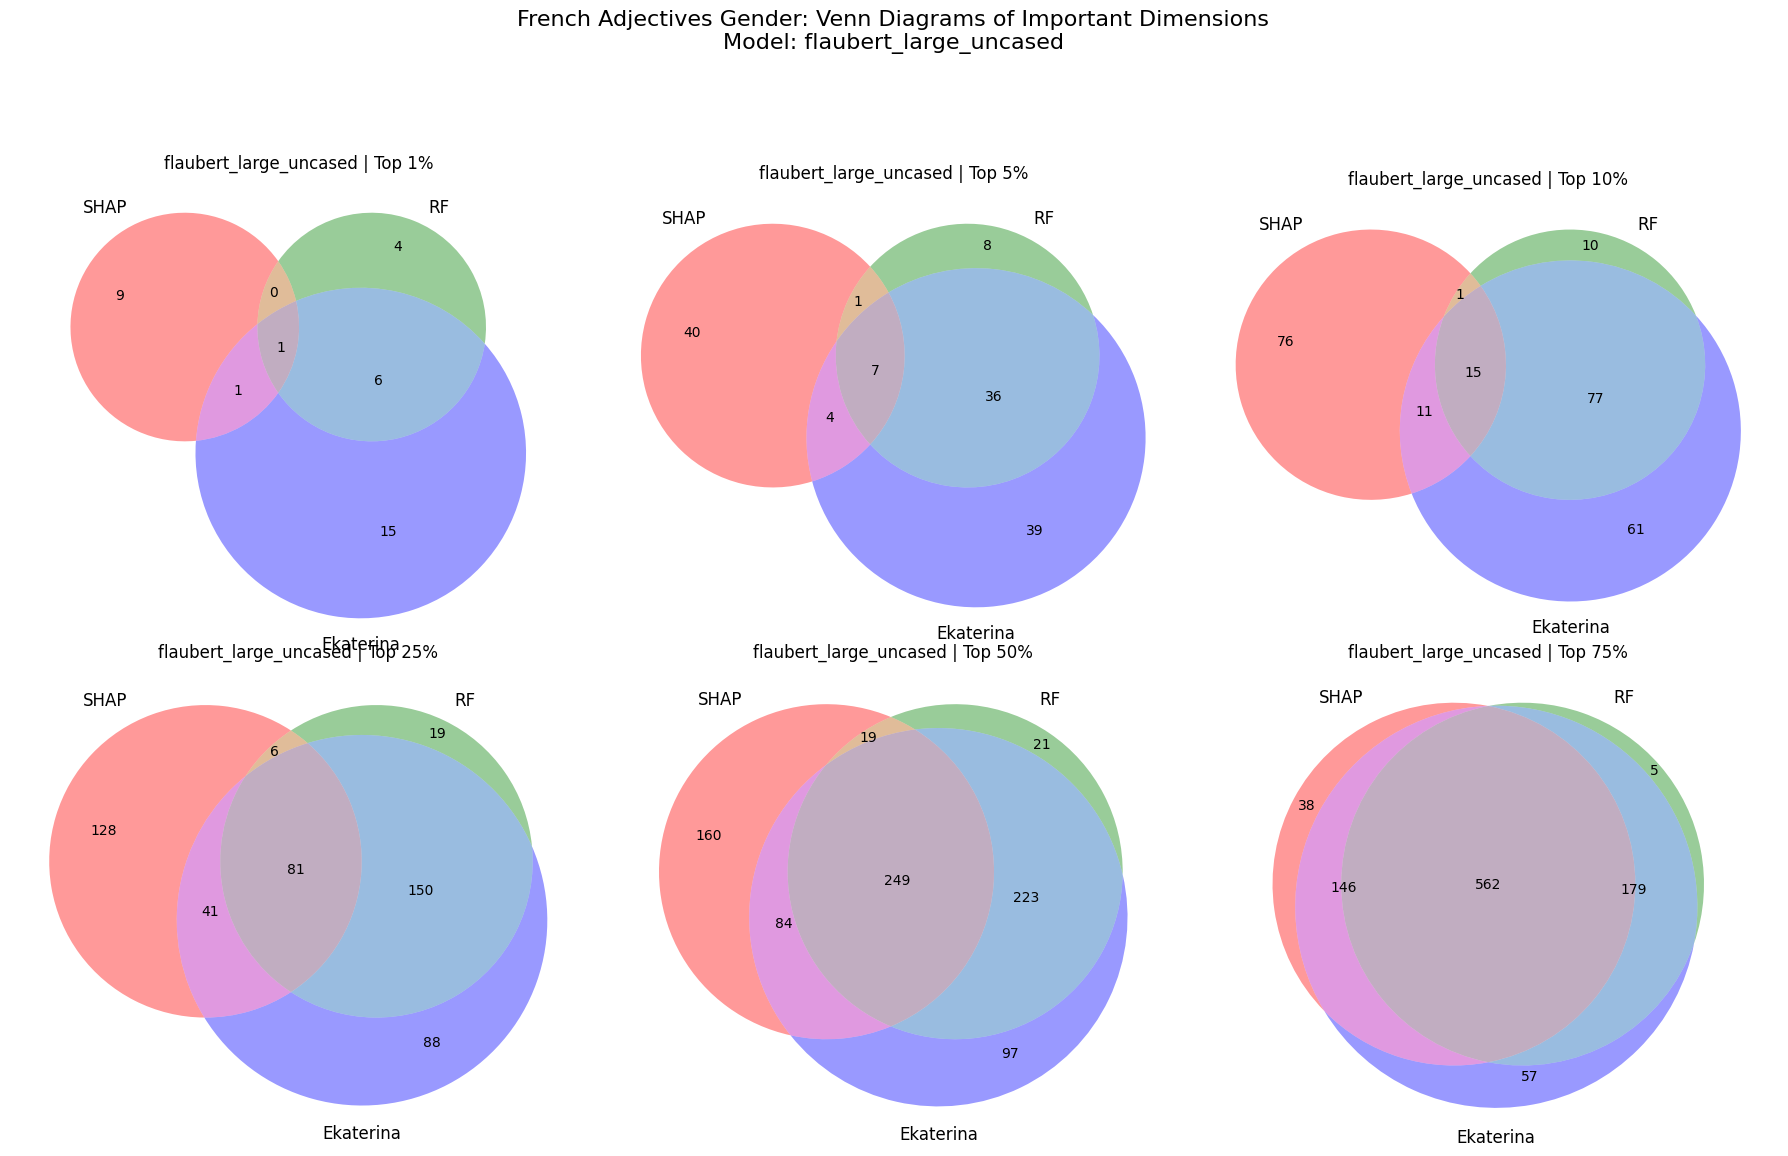

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import math

all_pretty_models = list(model_map.keys())   # ['flaubert_small_cased', ...]
topn_percs = [p for p in thresholds if p != 100]

for model_to_plot in all_pretty_models:
    print("\n" + "="*70)
    print(f"MODEL: {model_to_plot}")
    print("="*70)
    fig, axes = plt.subplots(2, 3, figsize=(18, 11))
    axes = axes.flatten()
    for i, topn_to_plot in enumerate(topn_percs):
        ax = axes[i]
        try:
            embed_dim = embed_size[model_to_plot]
            # SHAP dims
            S_col = find_col(shap, model_to_plot)
            s_df = shap[["Feature", S_col]].copy()
            s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
            s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
            s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)
            k = math.ceil(embed_dim * topn_to_plot / 100)
            S = set(s_df["dim"].iloc[:k])
            # RF dims
            RF_PATH = RF_PATHS[model_to_plot]
            rf_df = pd.read_csv(RF_PATH)
            rf_df["dim"] = rf_df["feature"].astype(int)
            R = set(rf_df["dim"].iloc[:k])
            # Ekaterina dims
            E = ek_dims[model_to_plot][topn_to_plot]
            venn3([S, R, E], set_labels=("SHAP", "RF", "Ekaterina"), ax=ax)
            ax.set_title(f"{model_to_plot} | Top {topn_to_plot}%", fontsize=12)
        except Exception as e:
            ax.axis('off')
            ax.text(0.5, 0.5, f"Error\n{e}", ha='center', va='center', fontsize=12)
    for j in range(len(topn_percs), 6):
        axes[j].axis('off')
    plt.suptitle(f"French Adjectives Gender: Venn Diagrams of Important Dimensions\nModel: {model_to_plot}", fontsize=16, y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


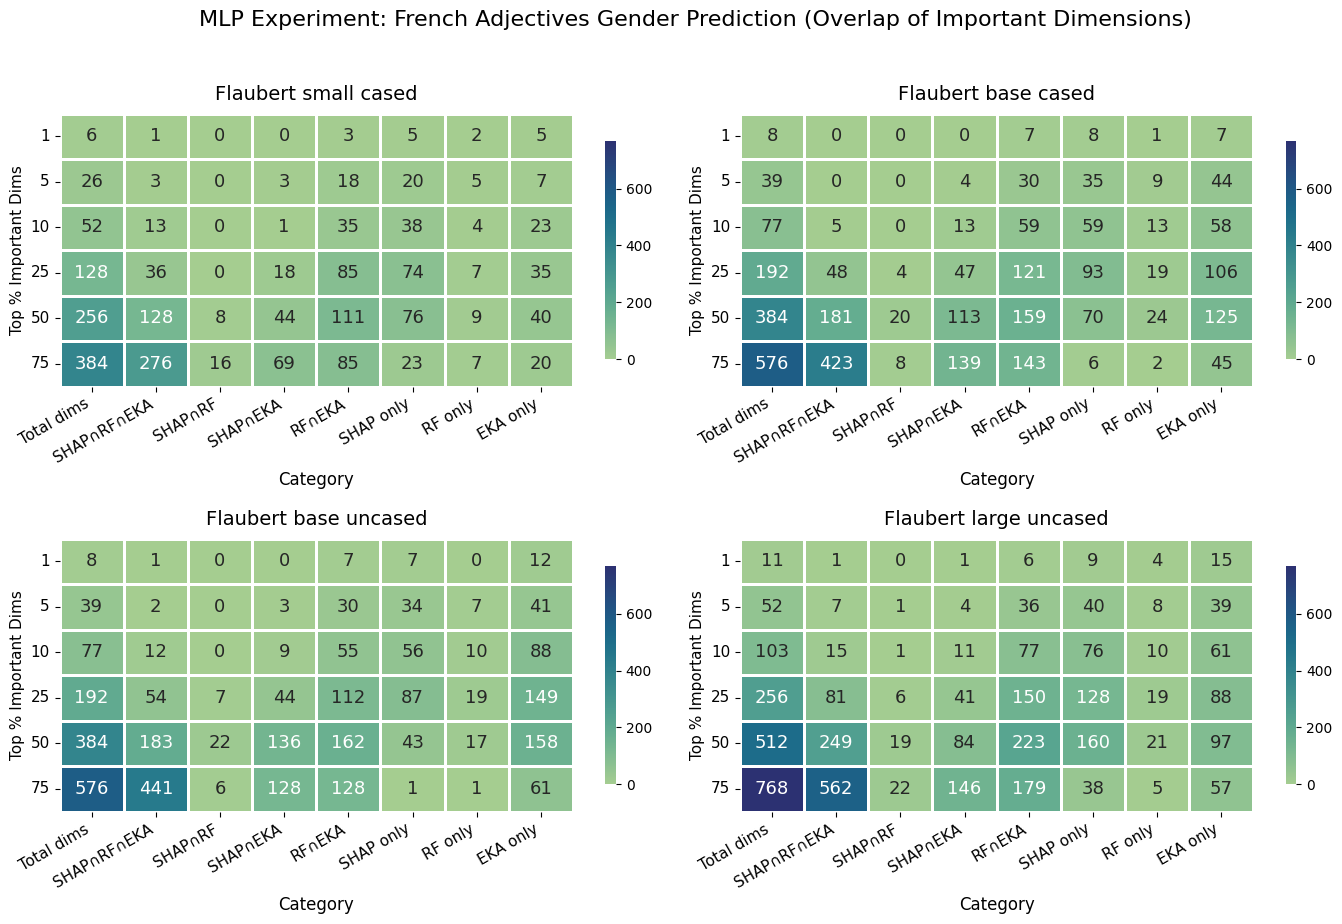

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Build a DataFrame for each model from results dict ---
model_dfs = {}
for m, tbl in results.items():
    df = pd.DataFrame.from_dict(tbl, orient="index")
    df.index.name = "Top %"
    model_dfs[m] = df

# --- Helper for pretty model names ---
def prettify(name):
    return name.replace("_", " ").capitalize()

# Ensure "Shared ALL" is renamed
for df in model_dfs.values():
    if "Shared ALL" in df.columns:
        df.rename(columns={"Shared ALL": "SHAP∩RF∩EKA"}, inplace=True)

columns_order = [
    "Total dims", "SHAP∩RF∩EKA", "SHAP∩RF", "SHAP∩EKA", "RF∩EKA",
    "SHAP only", "RF only", "EKA only"
]

# Filter each dataframe to exclude 100%
for model, df in model_dfs.items():
    if 100 in df.index:
        model_dfs[model] = df.loc[df.index != 100]

# Get global min/max for color scaling
vmin = min(df[columns_order].min().min() for df in model_dfs.values())
vmax = max(df[columns_order].max().max() for df in model_dfs.values())

model_names = list(model_dfs.keys())
n_models = len(model_names)
ncols = 2
nrows = int(np.ceil(n_models / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*4.5))
axes = axes.flatten()

for i, model in enumerate(model_names):
    df = model_dfs[model]
    ax = axes[i]
    sns.heatmap(
        df[columns_order], annot=True, fmt="d",
        cmap="crest",
        linewidths=1, linecolor='white',
        cbar=True,
        cbar_kws={"shrink": 0.8},
        annot_kws={"size": 13},
        ax=ax,
        vmin=vmin, vmax=vmax
    )
    ax.set_title(f"{prettify(model)}", fontsize=14, pad=10)
    ax.set_xlabel("Category", fontsize=12)
    ax.set_ylabel("Top % Important Dims", fontsize=11)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

# Hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle(
    "MLP Experiment: French Adjectives Gender Prediction (Overlap of Important Dimensions)",
    fontsize=16, y=1.02
)
plt.tight_layout(rect=[0, 0, 1, 0.99], pad=1.0, h_pad=1.5)
plt.show()
